In [1]:
import sys
import os

sys.path.insert(0, os.path.abspath("."))
sys.path.append(os.path.abspath("../../../../"))

In [2]:
from desc import set_device
set_device("gpu")

In [3]:
import numpy as np
np.set_printoptions(linewidth=np.inf, precision=4, suppress=True, threshold=sys.maxsize)
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import functools
import scipy

In [4]:
import desc

from desc.basis import *
from desc.backend import *
from desc.compute import *
from desc.coils import *
from desc.equilibrium import *
from desc.examples import *
from desc.grid import *
from desc.geometry import *

from desc.objectives import *
from desc.objectives.objective_funs import *
from desc.objectives.getters import *
from desc.objectives.normalization import compute_scaling_factors
from desc.objectives.utils import *
from desc.optimize._constraint_wrappers import *

from desc.transform import Transform
from desc.plotting import *
from desc.optimize import *
from desc.perturbations import *
from desc.profiles import *
from desc.compat import *
from desc.utils import *
from desc.magnetic_fields import *

from desc.__main__ import main
from desc.vmec_utils import vmec_boundary_subspace
from desc.input_reader import InputReader
from desc.continuation import solve_continuation_automatic

print_backend_info()

DESC version=0.14.1+371.g6a626f49a.
Using JAX backend: jax version=0.5.0, jaxlib version=0.5.0, dtype=float64.
Using device: NVIDIA GeForce RTX 4080 Laptop GPU (id=0), with 10.20 GB available memory.


In [ ]:
import glob

pwd = os.getcwd()

for fname in glob.glob(pwd + "/eq-poincare/eq-poincare*.h5"):
    foutputname = fname.split(".")[0].split("/")[-1]
    print(f"Plotting the output file {foutputname}")
    eqi = desc.io.load(fname)
    if foutputname != "eq-poincare-landreman2021-island-L3M3N4":
        eq0 = desc.io.load(fname.replace("eq-poincare", "eq-org"))
    else:
        eq0 = desc.io.load("./eq-org/eq-org-landreman2021-island-resolved.h5")  
    fig, ax = plot_1d(eqi, "iota", label="poincare", linecolor="r")
    fig, ax = plot_1d(eq0, "iota", label="original", ax=ax, linecolor="b")
    fig.suptitle(f"L{eqi.L} M{eqi.M} N{eqi.N}")
    fig.savefig(f"./eq-poincare/iota-landreman2021-L{eqi.L}M{eqi.M}N{eqi.N}.png", dpi=300)

Plotting the output file eq-fixed-n0-landreman2021-island-L6M6N6
Plotting the output file eq-fixed-n0-landreman2021-island-L6M6N4
Plotting the output file eq-fixed-n0-landreman2021-island-L10M10N4
Plotting the output file eq-fixed-n0-landreman2021-island-L3M3N4
Plotting the output file eq-fixed-n0-landreman2021-island-L14M3N4
Plotting the output file eq-fixed-n0-landreman2021-island-L12M12N4
Plotting the output file eq-fixed-n0-landreman2021-island-L16M16N4
Plotting the output file eq-fixed-n0-landreman2021-island-L14M14N4
Plotting the output file eq-fixed-n0-landreman2021-island-L6M3N4
Plotting the output file eq-fixed-n0-landreman2021-island-L8M3N4
Plotting the output file eq-fixed-n0-landreman2021-island-L4M4N4
Plotting the output file eq-fixed-n0-landreman2021-island-L8M8N4
Plotting the output file eq-fixed-n0-landreman2021-island-L8M8N8
Plotting the output file eq-fixed-n0-landreman2021-island-L10M10N10
Plotting the output file eq-fixed-n0-landreman2021-island-L12M3N4
Plotting the

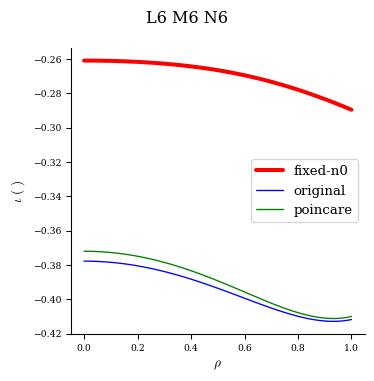

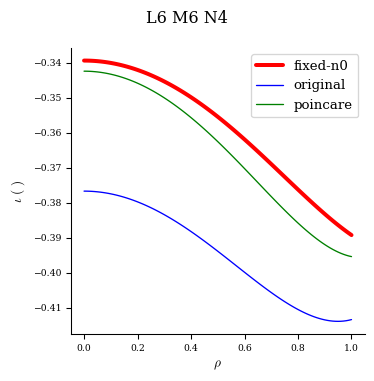

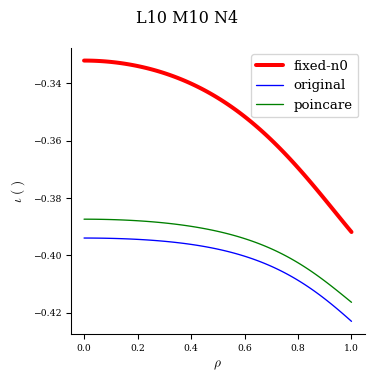

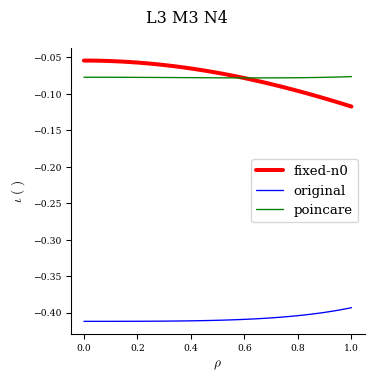

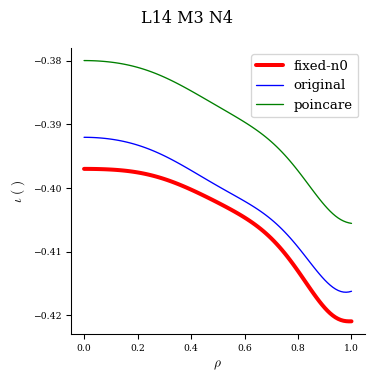

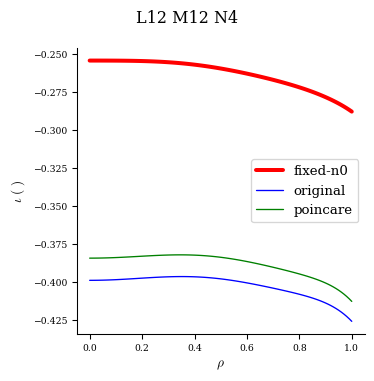

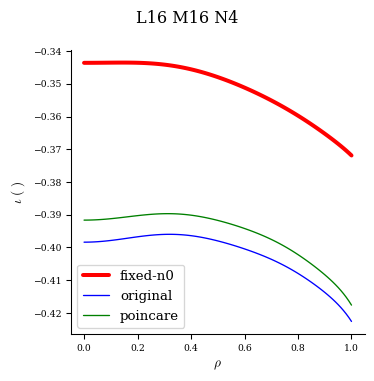

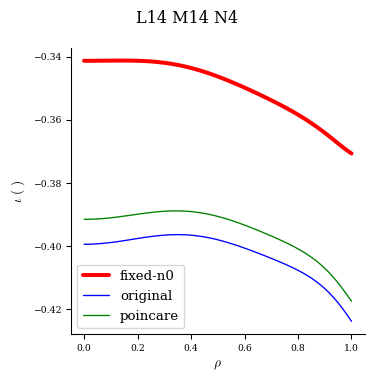

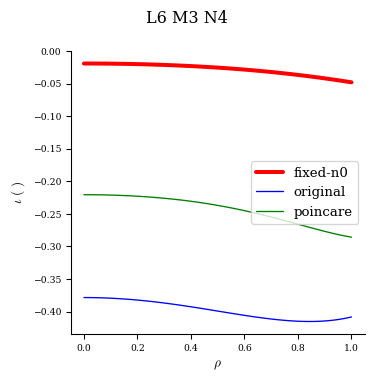

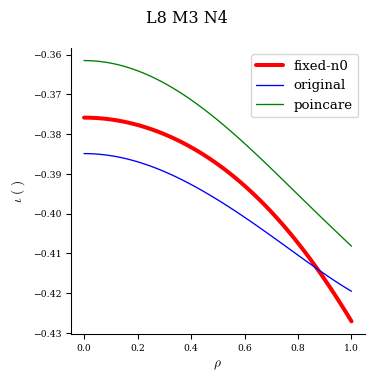

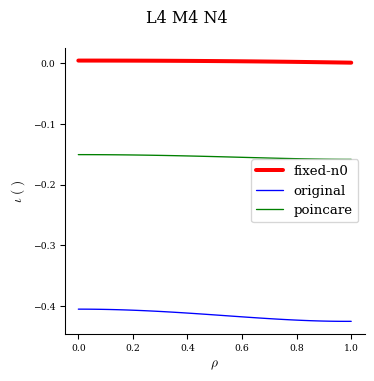

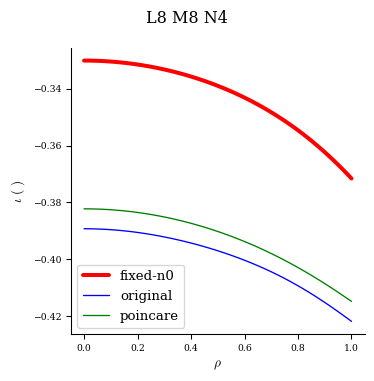

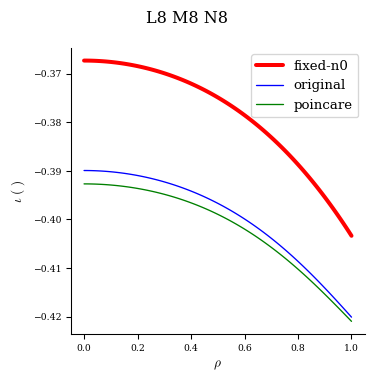

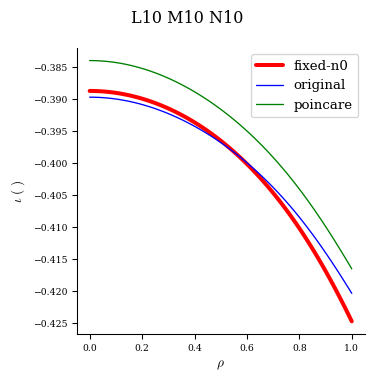

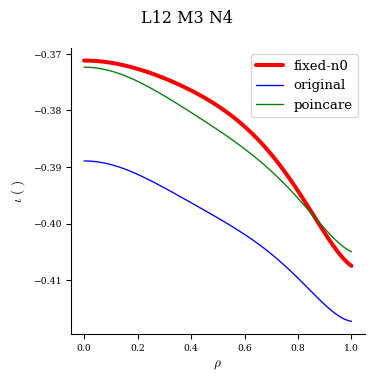

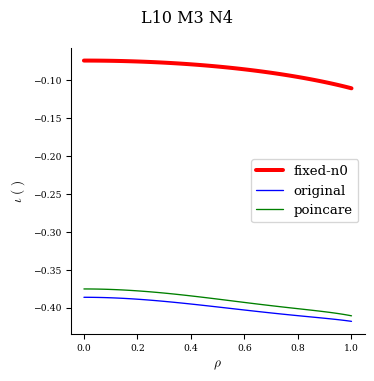

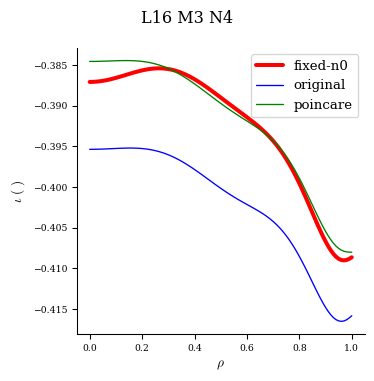

In [12]:
import glob

pwd = os.getcwd()

for fname in glob.glob(pwd + "/eq-fixed-n0/eq-fixed-n0*.h5"):
    foutputname = fname.split(".")[0].split("/")[-1]
    print(f"Plotting the output file {foutputname}")
    eqi = desc.io.load(fname)
    eqp = desc.io.load(fname.replace("eq-fixed-n0", "eq-poincare"))
    if foutputname != "eq-fixed-n0-landreman2021-island-L3M3N4":
        eq0 = desc.io.load(fname.replace("eq-fixed-n0", "eq-org"))
    else:
        eq0 = desc.io.load("./eq-org/eq-org-landreman2021-island-resolved.h5")
    fig, ax = plot_1d(eqi, "iota", label="fixed-n0", linecolor="r", lw=3)
    fig, ax = plot_1d(eq0, "iota", label="original", ax=ax, linecolor="b")
    fig, ax = plot_1d(eqp, "iota", label="poincare", ax=ax, linecolor="g")
    fig.suptitle(f"L{eqi.L} M{eqi.M} N{eqi.N}")
    fig.savefig(
        f"./all-iota-landreman2021-L{eqi.L}M{eqi.M}N{eqi.N}.png", dpi=300
    )